<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
<h3> This notebook will compare tuning curves of different neurons using the Allen Brain Observatory data </h3>
    
In the first notebook, we computed the tuning curve of one neuron to the 'Drifting Gratings' stimulus. Here we will do this for many neurons so we can see the diversity of visual responses.


### Standard imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

### Allen Brain Observatory set up

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '../data/allen-brain-observatory/visual-coding-2p/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>In the last notebook we walked through computing the two dimensional tuning curve for just one neuron. Here we are going to do this for many neurons. To make this easier, begin by writing a function to compute the tuning curve, plot the heatmap, and save the figure to the results folder.
<p>You will need the get_dff_traces_and_stim_table function that we used in the previous notebook as part of this so I've provided it here:
</div>

In [3]:
def get_dff_traces_and_stim_table(cell_specimen_id, stimulus): 
    #identify the session for a given cell id and stimulus
    exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id], stimuli=[stimulus])
    
    #get the session_id for that session
    session_id = exps[0]['id']
    
    #access the data for that session
    data_set = boc.get_ophys_experiment_data(session_id)
    
    #get the DFF trace for the cell
    timestamps, dff = data_set.get_dff_traces(cell_specimen_ids=[cell_specimen_id])
    dff_trace = dff[0,:]
    
    #get the stimulus table for the stimulus
    stim_table = data_set.get_stimulus_table(stimulus)
    
    #return everything
    return (timestamps, dff_trace, stim_table)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 1:** Write a function to compute and plot the tuning curve for a defined cell_id. I've outlined the function you need to write below - look back at your work in the previous notebook and do some strategic copying and pasting.
</div>


In [ ]:
def compute_tuning(cell_id):
    #get the dff_traces and the stimulus table using the function above
    
    #compute the cell response
    
    #get the orivals and tfvals
    
    #compute the tuning array
    
    #plot the heatmap of the tuning array and save it

In [7]:
def compute_tuning(cell_id):
    #get the dff_traces and the stimulus table using the function above
    timestamps, dff_trace, stim_table = get_dff_traces_and_stim_table(cell_id, 'drifting_gratings')
    
    #compute the cell response
    cell_response= np.zeros((len(stim_table),3))
    for i in range(len(stim_table)):
        cell_response[i,0] = stim_table.orientation[i]
        cell_response[i,1] = stim_table.temporal_frequency[i]
        cell_response[i,2] = dff_trace[stim_table.start[i]:stim_table.end[i]].mean()
    
    #get the orivals and tfvals
    all_ori = np.unique(cell_response[:,0])
    orivals = all_ori[np.isfinite(all_ori)]
    tfvals = np.unique(cell_response[:,1])
    tfvals = tfvals[np.isfinite(tfvals)]
    
    #compute the tuning array
    tuning_array = np.empty((8,5))
    for i,tf in enumerate(tfvals):
        tf_trials = cell_response[:,1]==tf
        subset = cell_response[tf_trials]
        for j,ori in enumerate(orivals):
            trials = subset[:,0]==ori
            tuning_array[j,i] = subset[trials,2].mean() 
    
    #plot the heatmap of the tuning array and save it
    plt.imshow(tuning_array)
    plt.xticks(range(5), tfvals)
    plt.yticks(range(8), orivals)
    plt.xlabel("TF")
    plt.ylabel("Direction")
    plt.title("Cell "+str(cell_id))
    plt.show()
    plt.savefig("/results/Cell "+str(cell_id)+".jpg")
    
    return tuning_array

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 2:** Test your function by computing and plotting the tuning curve for the neuron we looked at in the preious notebook, cell_id: 541513979
</div>

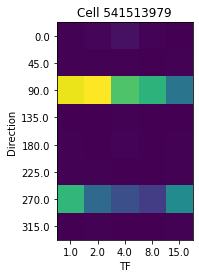

<Figure size 432x288 with 0 Axes>

In [8]:
_ = compute_tuning(541513979)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 3:** Compute and plot the tuning curves for cell_ids 541511905, 541512490, 541512611, 541512645, 541512079, 541511403, 541511670, 541511373, 541513771, 541511385, 541512607. 
(Note: these are all neurons from the same session as the neuron above)
</div>

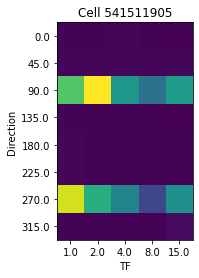

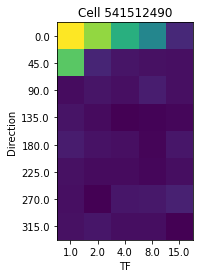

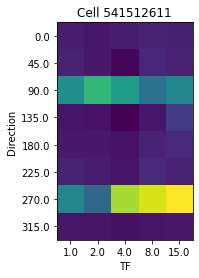

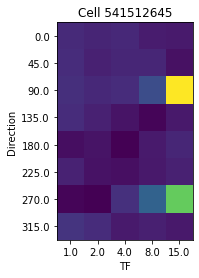

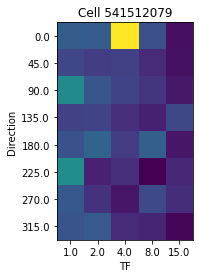

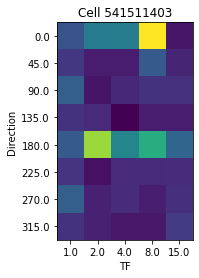

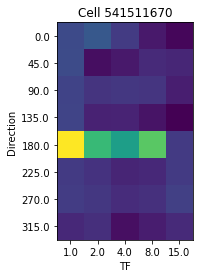

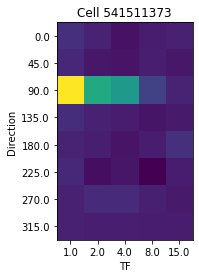

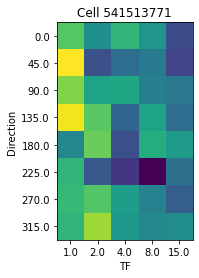

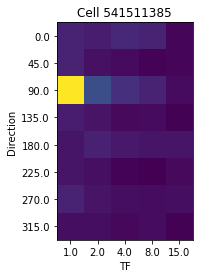

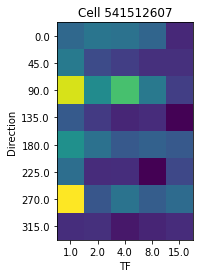

<Figure size 432x288 with 0 Axes>

In [11]:
cells = [541511905, 541512490, 541512611, 541512645, 541512079, 541511403, 541511670, 541511373, 541513771, 541511385, 541512607]
for cell_id in cells:
    compute_tuning(cell_id)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
What are some things you notice when looking at these? What are some of the ways different neurons have different tuning curves?
</div>